In [12]:
import numpy as np
import skimage
from skimage import color
from skimage.draw import circle
from skimage import color
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import os
import scipy.misc as sm
from scipy.ndimage.filters import convolve
from IPython.display import Image
from PIL import Image
import cv2
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

#Read and display the image to analyze
def load_img(filename):
    if os.path.isfile(os.getcwd() + '/' + filename):
        img = mpimg.imread(filename)
    return img

def draw_patch(Img, r, c, rad=7,col=0):   
    if col == 2:
        p = [0,1.0,1.0] #cyan
    else:
        p = [0,1.0,0.0] #green
    if col == 1: 
        p = [1.0,0.0,0.0]#red
    if col == 0: 
        p = [0.0,0.0,0.0]#black
        
    rr, cc = circle(r, c, rad)
    Img[rr,cc, 0:3]= p 



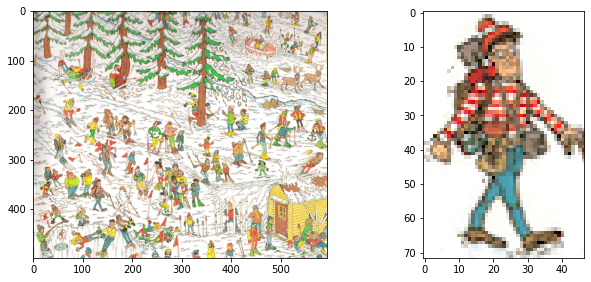

In [13]:
#1. Load the image and Waldo template
img1 = load_img('images/waldo_onIce.png')
temp1 = load_img('images/waldo_template.png')

#Convert the two images to grayscale
img = skimage.color.rgb2gray(img1)
temp = skimage.color.rgb2gray(temp1)

#Display the 2 images
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(img1)
ax[1].imshow(temp1)
fig.tight_layout()
plt.show()

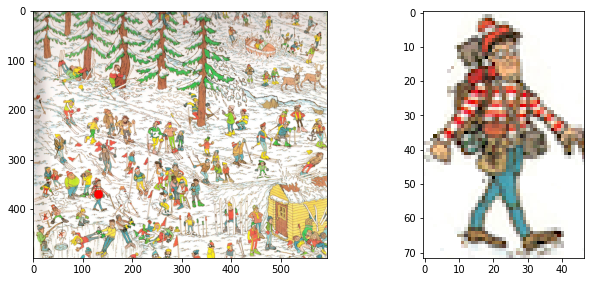

In [14]:
def normcrosscorr(Img, f):
    """
    This function uses normalized cross-correlation to find Waldo 
    
    This draws a RED circle around Waldo
    """
    
    
    imgRow, imgCol = Img.shape
    filterRow, filterCol = f.shape
    
    #Normalize Image
    imageMean = Img.mean()
    stdDevImage = Img.std()
    normImage = (Img - imageMean)/stdDevImage
    
    #Normalize Template
    tempMean = f.mean()
    stdDevTemp = f.std()
    normTemp = (f - tempMean)/stdDevTemp
    
    newMatrix = np.array([[0 for j in range(imgCol)] for i in range(imgRow)], dtype=np.uint8)

    maxValue = float('-inf')
    
    for i in range(imgRow-filterRow):
        for j in range(imgCol-filterCol):
            scope = normImage[i:i+filterRow, j:j+filterCol]  #get patch needed from original image
            store = np.sum(normTemp*scope) #Multiply with template and sum
           
            newMatrix[i][j] = store   # store value in correlation Matrix
            if(store>maxValue):
                maxValue = store                     # Keep track of maximum value
                # Template will be at the centre of i+filterRow,j+filterCol of Max                                           
                finalRowIndex = i + (filterRow-1)//2     
                finalColIndex = j + (filterCol-1)//2 
   
    #newMatrix = newMatrix/newMatrix.mean()
    return (finalRowIndex,finalColIndex,newMatrix)
    
    
store = normcrosscorr(img,temp)



draw_patch(img1, store[0], store[1], rad=9,col=1)    #Red Circle

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(img1)
ax[1].imshow(temp1)
fig.tight_layout()
plt.show()





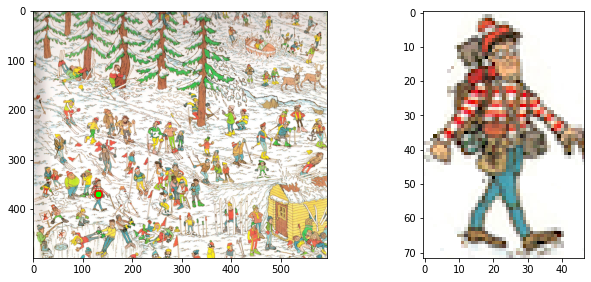

In [15]:
def SSD(Img, f):
    """
    This uses Sum of square differences to find Waldo
    
    Indicated with a green circle
    
    """
      
    finalRowIndex = 0  #to store the final endpoint of match
    finalColIndex = 0
    
    imgRow, imgCol = Img.shape
    filterRow, filterCol = f.shape
    
    minValue = float('inf')
    newMatrix = np.array([[0 for j in range(imgCol)] for i in range(imgRow)], dtype=np.uint8)

    for i in range(imgRow-filterRow):
        for j in range(imgCol-filterCol):
            scope = Img[i:i+filterRow, j:j+filterCol] #get patch needed from original image
            
            store = np.square(f-scope) # calculate SSD
            summed = np.sum(store)
            
            newMatrix[i][j] = summed          # Store in correlation Matrix
            if(summed<minValue):       
                minValue = summed
                # Template will be at the centre of i+filterRow,j+filterCol of Min value found                                           

                finalRowIndex = i + (filterRow-1)//2 
                finalColIndex = j + (filterCol-1) //2 
    
    return (finalRowIndex,finalColIndex,newMatrix)
            
    
store = SSD(img,temp)


draw_patch(img1, store[0], store[1], rad=6,col=4)   #Green Circle

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ax = axes.ravel()
ax[0].imshow(img1)
ax[1].imshow(temp1)
fig.tight_layout()
plt.show()